# image compression using PCA

In [24]:

from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




In [ ]:
mnist = pd.read_csv('mnist.csv')
mnist.head()

In [24]:
mnist.drop(columns='label', inplace=True)
mnist.head()
mnist.shape

(60000, 784)

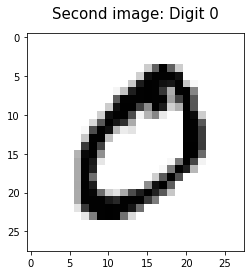

In [25]:


second_image = mnist.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
plt.savefig("Second image.png")

In [26]:
# range of the data (values)
#2nd image
print(mnist.iloc[1].min())
print(mnist.iloc[1].max())
#0
#255

0
255


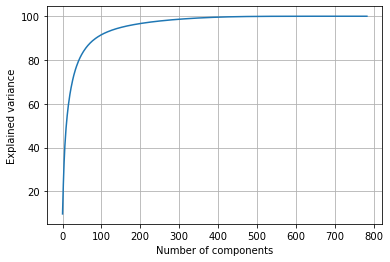

In [27]:

pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

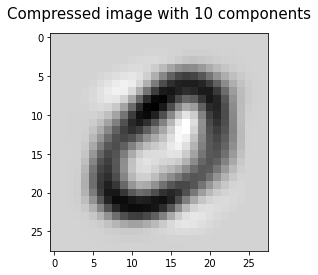

In [28]:

pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
plt.savefig("image_pca_10.png")

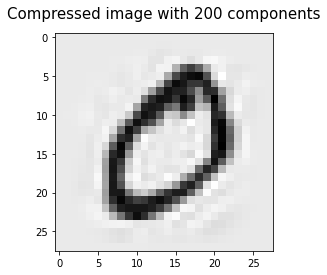

In [29]:

pca_200 = PCA(n_components=200)
mnist_pca_200_reduced = pca_200.fit_transform(mnist)
mnist_pca_200_recovered = pca_200.inverse_transform(mnist_pca_200_reduced)

image_pca_200 = mnist_pca_200_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_200, cmap='gray_r')
plt.title('Compressed image with 200 components', fontsize=15, pad=15)
plt.savefig("image_pca_200.png")

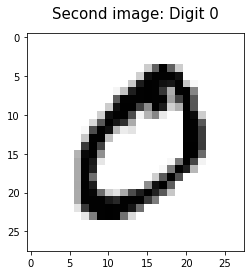

In [30]:
second_image = mnist.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
plt.savefig("Second image.png")

In [31]:
# explained varaince in 200 componenets
np.cumsum(pca_200.explained_variance_ratio_ * 100)[-1]


96.60622203003757

# PCA with tabular data

In [92]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [93]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [94]:
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [97]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels



In [98]:
breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [99]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [100]:
breast_dataset.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [103]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(569, 30)

In [104]:
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [105]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)

normalised_breast.tail()


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [106]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [107]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()


,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [108]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))
# 37% of the explained variance is lost 

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

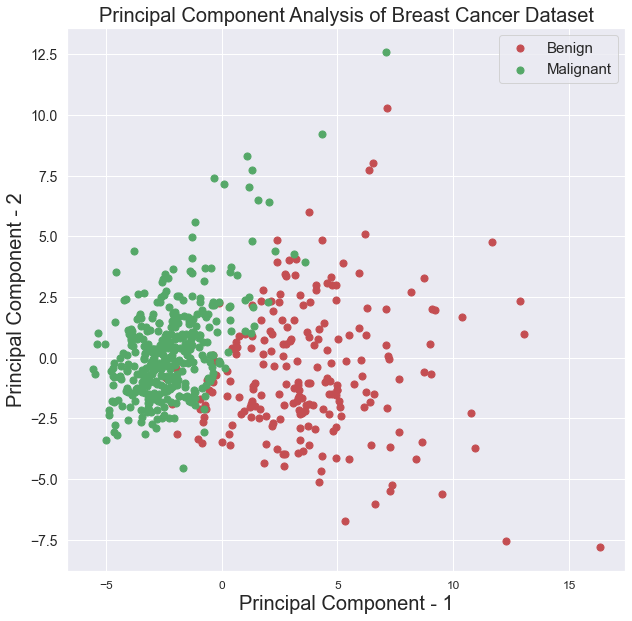

In [109]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

we can see that the benign class is green and the malignant class is red. They are linearly seperable in 2d space

# image compression with SVD

In [62]:
from matplotlib.image import imread
import os

In [63]:
plt.rcParams['figure.figsize'] = [16, 8]

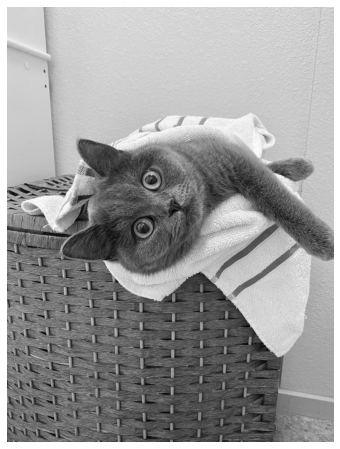

In [75]:
A = imread('lola.jpg')
X = np.mean(A, -1)

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [76]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

In [73]:
U.shape
r=5

In [74]:
U[:,:r]
S[0:r,:r]
VT[:r,:]

array([[-0.01878895, -0.01880095, -0.01879595, ..., -0.02128303,
        -0.02130555, -0.02131675],
       [ 0.01125015,  0.01115466,  0.01078896, ...,  0.02664536,
         0.02662364,  0.02660989],
       [-0.00127137, -0.00111197, -0.00092102, ..., -0.01531612,
        -0.01552987, -0.01566003],
       [ 0.01710906,  0.01698454,  0.01686933, ...,  0.01545654,
         0.01542921,  0.01548072],
       [ 0.01656159,  0.01584931,  0.01516443, ..., -0.01076053,
        -0.01078367, -0.01070356]])

## matrix approximations of the image with rank 5, 20, 100

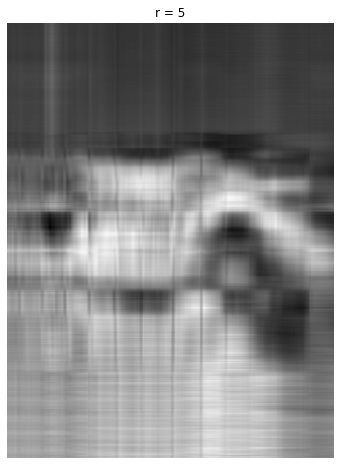

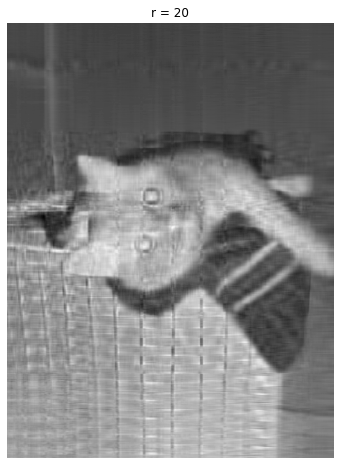

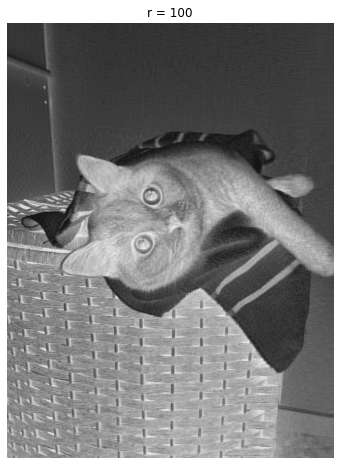

In [77]:

j=0
for r in (5, 20, 100):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j+=1
    img = plt.imshow(256-Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

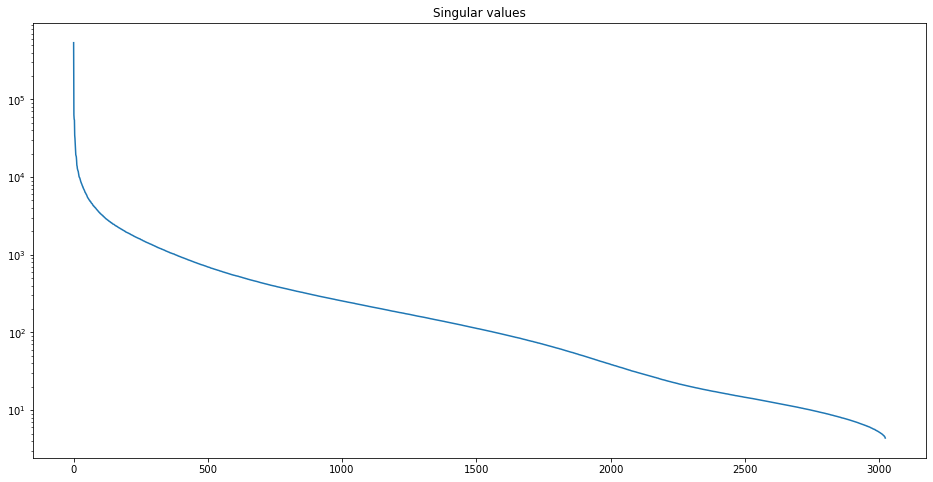

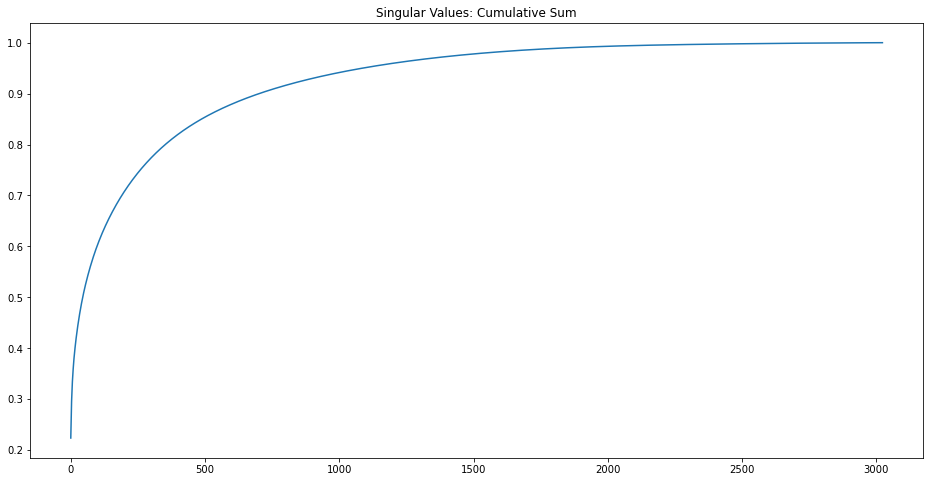

In [78]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

# 

# t-SNE with images

# LLE with images

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


In [80]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

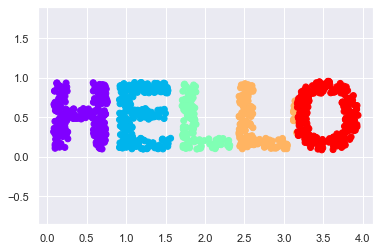

In [81]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [83]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

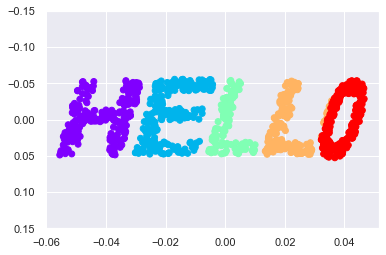

In [84]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# ISOMAP on faces

In [85]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

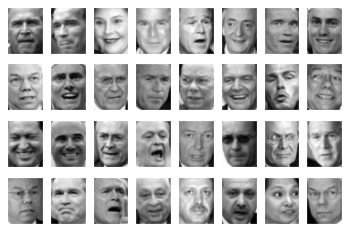

In [86]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

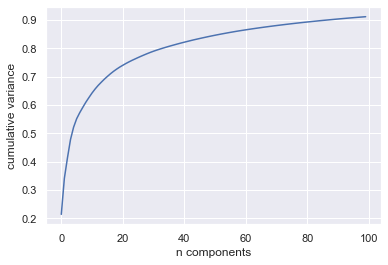

In [88]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100, svd_solver='randomized', whiten=True).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [89]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [90]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

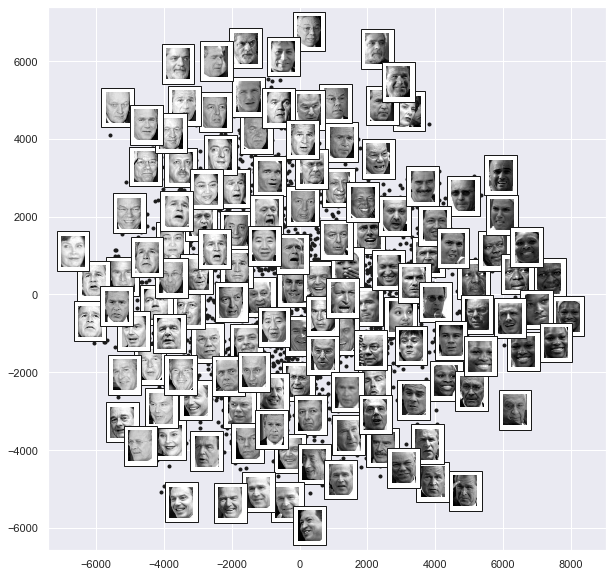

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

# isomap with image data

In [2]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

In [3]:
X, _ = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [15]:
X[1][12]

16.0

In [4]:
embedding = Isomap(n_components=2)

In [14]:
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

(100, 2)

# ISOMAP 

In [31]:
def isomap(data, n_components=2, n_neighbors=6, dist=False):
    """
    Dimensionality reduction with isomap algorithm
    :param data: input image matrix of shape (n,m) if dist=False, square distance matrix of size (n,n) if dist=True
    :param n_components: number of components for projection
    :param n_neighbors: number of neighbors for distance matrix computation
    :param dist: boolean indicating the data type
    :return: Projected output of shape (n_components, n)
    """
    if not dist:
        # Compute distance matrix
        data, _ = distance_mat(data, n_neighbors)

    # Compute shortest paths from distance matrix
    from sklearn.utils.graph import graph_shortest_path
    graph = graph_shortest_path(data, directed=False)
    graph = -0.5 * (graph ** 2)

    # Return the MDS projection on the shortest paths graph
    return mds(graph, n_components)

In [18]:

def distance_mat(X, n_neighbors=6):
    """
    Compute the square distance matrix using Euclidean distance
    :param X: Input data, a numpy array of shape (img_height, img_width)
    :param n_neighbors: Number of nearest neighbors to consider, int
    :return: numpy array of shape (img_height, img_height), numpy array of shape (img_height, n_neighbors)
    """
    def dist(a, b):
        return np.sqrt(sum((a - b)**2))

    # Compute full distance matrix
    distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])

    # Keep only the 6 nearest neighbors, others set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
    for k,i in enumerate(sort_distances):
        neighbors[k,i] = distances[k,i]
    return neighbors, sort_distances

In [19]:
def center(K):
    """
    Method to center the distance matrix
    :param K: numpy array of shape mxm
    :return: numpy array of shape mxm
    """
    n_samples = K.shape[0]

    # Mean for each row/column
    meanrows = np.sum(K, axis=0) / n_samples
    meancols = (np.sum(K, axis=1)/n_samples)[:, np.newaxis]

    # Mean across all rows (entire matrix)
    meanall = meanrows.sum() / n_samples

    K -= meanrows
    K -= meancols
    K += meanall
    return K

In [22]:
def mds(data, n_components=2):
    """
    Apply multidimensional scaling (aka Principal Coordinates Analysis)
    :param data: nxn square distance matrix
    :param n_components: number of components for projection
    :return: projected output of shape (n_components, n)
    """

    # Center distance matrix
    center(data)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_val_cov, eig_vec_cov = np.linalg.eig(data)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))
    ]

    # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    matrix_w = np.hstack(
        [eig_pairs[i, 1].reshape(data.shape[1], 1) for i in range(n_components)]
    )

    # Return samples in new subspace
    return matrix_w

In [27]:
# demo of this 
data = np.load("digits-labels.npz")
d = data['d']
l = data['l']
five_idx = np.argwhere(l == 5)
d_fives = d[:, five_idx].squeeze().T

In [28]:
# isomap
distance, neighbors_idx = distance_mat(d_fives)

In [32]:
transform_isomap = isomap(distance, dist=True)

In [35]:
print(transform_isomap.shape)


(892, 2)


In [38]:
plt.show(transform_isomap, d_fives)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()